In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os, sys
import numpy as np
from pathlib import Path
import pickle
import matplotlib as mpl

cwd = os.getcwd()
dirLib = cwd + r'/library'
if dirLib not in sys.path:
    sys.path.append(dirLib)

from load_ARSENL_data import load_INPHAMIS_data, set_binwidth

mpl.rcParams.update({"figure.facecolor": "white"})

In [97]:
home = str(Path.home())

load_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'

fname_dead_fit = r'\eval_loss_dtimeTrue_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+05_best_fit.csv'
fname_pois_fit = r'\eval_loss_dtimeFalse_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+05_best_fit.csv'

fname_ttag = r'\fit_figures\eval_loss_dtimeTrue_Rho1000000.0-10000000000.0_order5-21_ref_shots1.00E+07_lsr_shots1.00E+05_use_final_True_best_fit.pkl'

use_sim = True

In [98]:
df_dead_fit = pd.read_csv(load_dir + fname_dead_fit)
df_pois_fit = pd.read_csv(load_dir + fname_pois_fit)

infile_ttag = open(load_dir + fname_ttag, 'rb')
load_ttag = pickle.load(infile_ttag)

In [99]:
if use_sim:
    rho_lst = []
    rho_name_lst = []
    for column in df_dead_fit:
        if column[:3] == 'Rho':    
            rho_lst.append(float(column[3:]))
            rho_name_lst.append(column)
    print('rho values investigated: {}'.format(rho_lst))
else:
    OD_lst = []
    OD_name_lst = []
    for column in df_dead_fit:
        if column[:2] == 'OD':    
            OD_lst.append(float(column[2:]))
            OD_name_lst.append(column)
    print('OD values investigated: {}'.format(OD_lst))

rho values investigated: [100000000.0, 10000000000.0, 1200000000.0, 13000000.0, 150000000.0, 1700000000.0, 18000000.0, 210000000.0, 25000000.0, 2500000000.0, 300000000.0, 3500000000.0, 36000000.0, 420000000.0, 5000000000.0, 51000000.0, 600000000.0, 7000000000.0, 73000000.0, 850000000.0]


In [100]:
sort_idx = np.argsort(rho_lst)
sorted_rho = np.array(rho_lst)[sort_idx]

In [101]:
idx = 16

t_fine = df_dead_fit['time vector'].to_numpy()
if use_sim:
    dead_fit = df_dead_fit[rho_name_lst[idx]]
    pois_fit = df_pois_fit[rho_name_lst[idx]]
else:
    dead_fit = df_dead_fit[OD_name_lst[idx]]
    pois_fit = df_pois_fit[OD_name_lst[idx]]

flight_time = load_ttag[0][idx].to_numpy()
true_flight_time = load_ttag[1].to_numpy()
n_shots = load_ttag[5]

In [72]:
t_min = t_fine[0]
t_max = t_fine[-1]
if use_sim:
    dt = 25e-12  # [s]
    t_fine = np.arange(t_min, t_max, dt)
else:
    dt = np.diff(t_fine)[0]

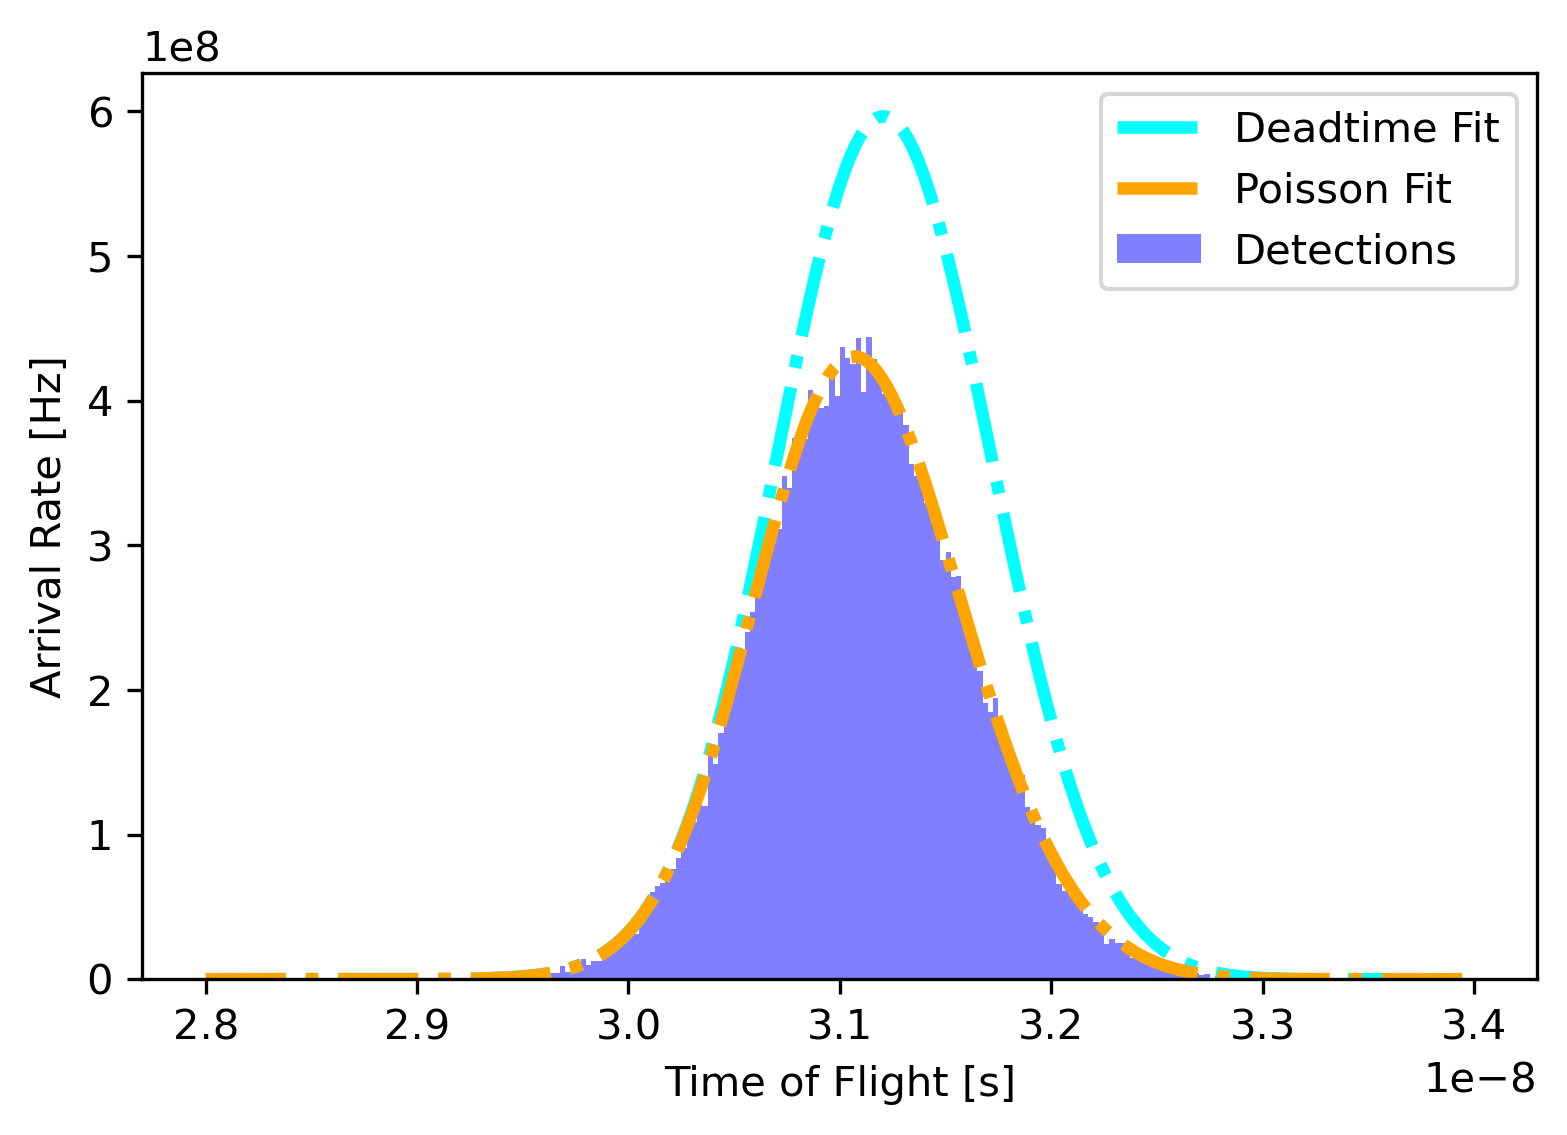

In [118]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(t_fine, dead_fit, label='Deadtime Fit', linestyle='-.', linewidth=3, color='cyan')
ax.plot(t_fine, pois_fit, label='Poisson Fit', linestyle='-.', linewidth=3, color='orange')

bin_array = set_binwidth(t_min, t_max, dt)
n, bins = np.histogram(flight_time, bins=bin_array)
binwidth = np.diff(bins)[0]
N = n / binwidth / n_shots  # [Hz]
center = 0.5 * (bins[:-1] + bins[1:])
ax.bar(center, N, align='center', color='blue', width=binwidth, alpha=0.5, label='Detections')

ax.set_ylabel('Arrival Rate [Hz]')
ax.set_xlabel('Time of Flight [s]')
# ax.set_title('Transmission: {:.4f}'.format(10**-float(OD_name_lst[idx][-3:])))
plt.legend()
plt.show()